In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math
import operator
%matplotlib inline

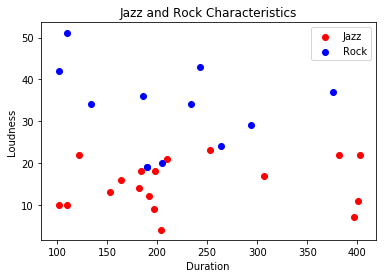

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0])

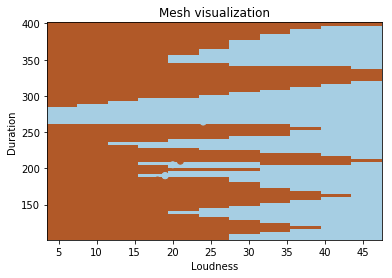

In [4]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

# Changing mesh size

In [5]:
def plot_mesh(mesh_size):
    # Mesh size.

    # Plot the decision boundary. We assign a color to each point in the mesh.
    x_min = X[:, 0].min() - .5
    x_max = X[:, 0].max() + .5
    y_min = X[:, 1].min() - .5
    y_max = X[:, 1].max() + .5
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, mesh_size),
        np.arange(y_min, y_max, mesh_size)
    )
    Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot.
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(6, 4))
    plt.set_cmap(plt.cm.Paired)
    plt.pcolormesh(xx, yy, Z)

    # Add the training points to the plot.
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.xlabel('Loudness')
    plt.ylabel('Duration')
    plt.title('Mesh visualization')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

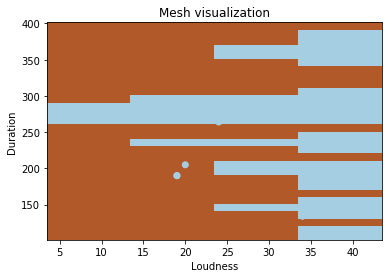

In [9]:
plot_mesh(10.0)

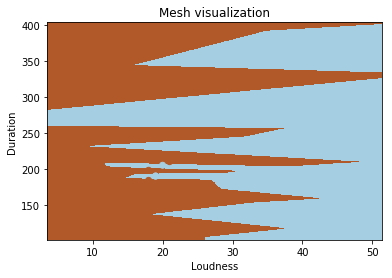

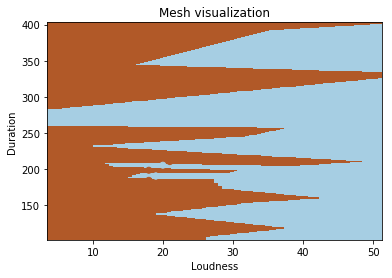

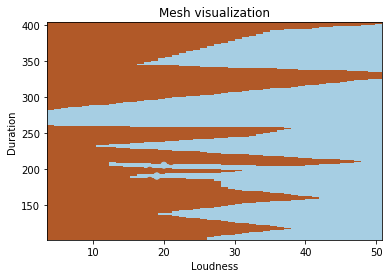

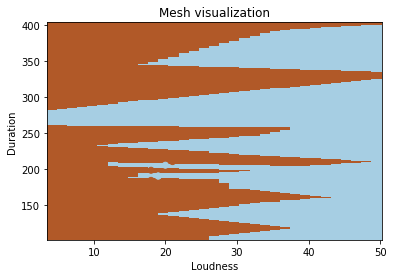

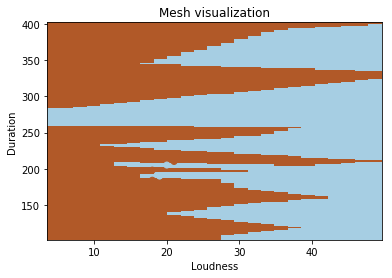

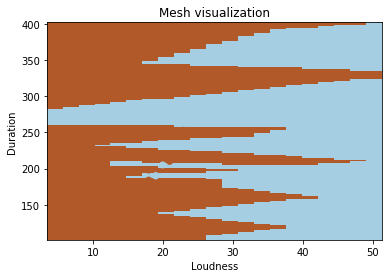

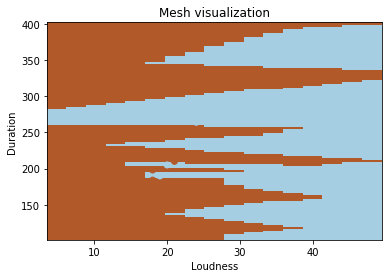

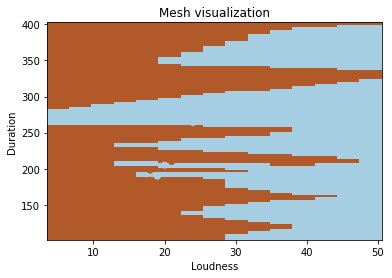

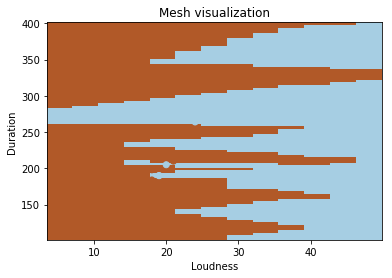

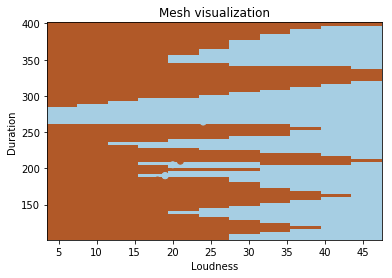

In [10]:
for h in np.linspace(0.125, 4, num=10):
    plot_mesh(h)

# Manual Nearest Neighbor algorithm

1. start on an arbitrary vertex as current vertex.
2. find out the shortest edge connecting current vertex and an unvisited vertex V.
3. set current vertex to V.
4. mark V as visited.
5. if all the vertices in domain are visited, then terminate.
6. Go to step 2

In [6]:
from nearest_neighbor import KNN
myKNN = KNN(1)
myKNN.fit(X, Y)

In [8]:
myKNN.predict(duration=184, loudness=18)

1

Predicted Outcome for [ 18 184 ] is: 1.0  
Predicted Outcome for [ 25 85 ] is: 1.0  
Predicted Outcome for [ 110 52 ] is: 0.0  
Predicted Outcome for [ 24 190 ] is: 1.0  

In [17]:
print(myKNN.predict(184,18))
print(myKNN.predict(85, 25))
print(myKNN.predict(52, 110))
print(myKNN.predict(190, 24)) # duration of 187 through 194 at a loudness of 24 => 0...

1
1
0
0


In [30]:
print(neighbors.predict([[18, 184]]))
print(neighbors.predict([[25, 85]]))
print(neighbors.predict([[110, 52]]))
print(neighbors.predict([[24, 190]]))

[1]
[1]
[0]
[0]
